# Import Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df=pd.read_csv(".csv")
df

,ax,ay,az,gx,gy,gz,label
0,272,13524,7848,-679,-183,-61,0
1,408,13384,7884,-707,-178,-38,0
2,404,13380,7864,-748,-168,-57,0
3,412,13292,7816,-714,-146,-19,0
4,292,13368,7892,-752,-129,-27,0
...,...,...,...,...,...,...,...
599994,2300,792,15244,-694,-187,87,3
599995,2304,736,15196,-666,-191,90,3
599996,2348,724,15180,-689,-192,81,3
599997,2220,684,15220,-695,-208,96,3


In [3]:
df.shape

(599999, 7)

In [4]:
df.columns

Index(['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label'], dtype='object')

In [5]:
df.isnull()

,ax,ay,az,gx,gy,gz,label
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
599994,False,False,False,False,False,False,False
599995,False,False,False,False,False,False,False
599996,False,False,False,False,False,False,False
599997,False,False,False,False,False,False,False


In [6]:
df.isnull().sum().sum()

0

# Selecting Feature columns

In [7]:
X = df.iloc[:, :-1]
X

,ax,ay,az,gx,gy,gz
0,272,13524,7848,-679,-183,-61
1,408,13384,7884,-707,-178,-38
2,404,13380,7864,-748,-168,-57
3,412,13292,7816,-714,-146,-19
4,292,13368,7892,-752,-129,-27
...,...,...,...,...,...,...
599994,2300,792,15244,-694,-187,87
599995,2304,736,15196,-666,-191,90
599996,2348,724,15180,-689,-192,81
599997,2220,684,15220,-695,-208,96


# Target Column

In [8]:
y = df.iloc[:, -1]
y

0         0
1         0
2         0
3         0
4         0
         ..
599994    3
599995    3
599996    3
599997    3
599998    3
Name: label, Length: 599999, dtype: int64

In [9]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Model Training

In [11]:

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)


# Accuracy

In [12]:

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.86%


# F1-Score 

In [13]:

f1 = f1_score(y_test, predictions, average='weighted')
print("F1 Score: {:.2f}".format(f1))


F1 Score: 1.00


# Recall:

In [14]:

recall = recall_score(y_test, predictions, average='weighted')
print("Recall: {:.2f}".format(recall))


Recall: 1.00


# Precision:

In [15]:

precision = precision_score(y_test, predictions, average='weighted')
print("Precision: {:.2f}".format(precision))


Precision: 1.00


# Standard Deviation:

In [16]:

std_dev_target = df['label'].std()
print("Standard Deviation of Target Column: {:.2f}".format(std_dev_target))


Standard Deviation of Target Column: 1.12


# Mean:

In [17]:

mean_value = df['label'].mean()
print("Mean: {:.2f}".format(mean_value))
mean_values = df.mean()
print(mean_values)


Mean: 1.50
ax         576.232067
ay       11162.512336
az        5555.551879
gx        -617.761698
gy         322.575884
gz          73.514931
label        1.500024
dtype: float64


# Average:

In [18]:

average_value = df['label'].mean()
print("Average: {:.2f}".format(average_value))
average_values = df.mean()
print(average_values)



Average: 1.50
ax         576.232067
ay       11162.512336
az        5555.551879
gx        -617.761698
gy         322.575884
gz          73.514931
label        1.500024
dtype: float64


# Confusion Matrix:

In [19]:

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[29925     0    51     0]
 [    0 29945    66     0]
 [    4    48 30010     0]
 [    1     0     0 29950]]


# Ploting Confusion Matrix:

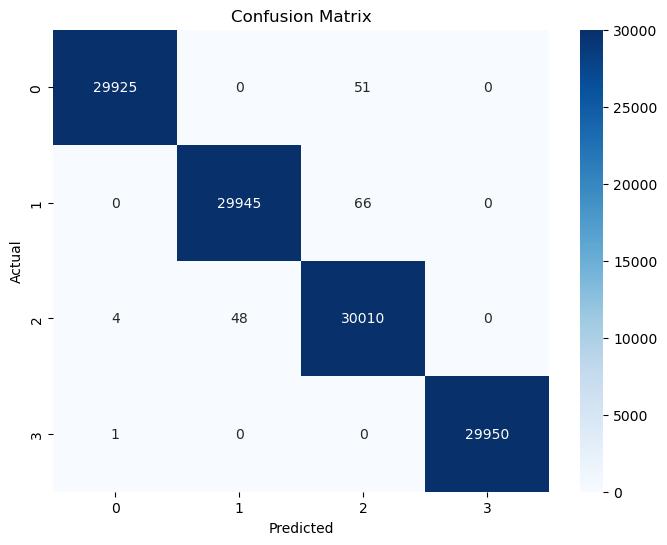

In [20]:

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Predicted Activity:

In [21]:

# Enter actual values data
new_data_values = [1912,-1932,15028,-586,-149,93]

new_data = pd.DataFrame([new_data_values], columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz'])

new_predictions = rf_model.predict(new_data.values.reshape(1, -1))

# Map predicted labels to activity names
for prediction in new_predictions:
    if prediction == 2:
        activity_result = "Walking"
    elif prediction == 3:
        activity_result = "Lying"
    else:
        activity_result = "Invalid"

    print("Predicted Activity: {}".format(activity_result))


Predicted Activity: Lying


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
import pickle
# Save the trained Random Forest model to a file
with open('rf_model_activity.pkl', 'wb') as file:
    pickle.dump(rf_model, file)